# Chapter 2: End-to-End Machine Learning Project

**Book:** Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (3rd Edition)

In [35]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display settings
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# Plot settings
%matplotlib inline
plt.rc('font', size=10)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

## Working with Real Data

### Data Repositories
- [OpenML](https://www.openml.org/) - data sets and tasks (*couldn't sign up, try later*)
- [Kaggle](https://kaggle.com/datases)
- [UC Irvine ML Repository](https://archive.ics.uci.edu/datasets) - datasets (e.g. Iris)
- [Amazon's AWS datasets](https://registry.opendata.aws/)
- [TensorFlow datasets](https://www.tensorflow.org/datasets)
  
### Meta portals and lists
- [DataPortals](https://dataportals.org/)
- [Wikipedia's list of ML datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
- [Quora's list](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
- [Datasets subreddit](https://www.reddit.com/r/datasets/)

### Papers
- https://huggingface.co/papers/trending

## ML Project Checklist
(full checklist in the book's Appendix A)

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data
4. Prepare the data
5. Shorlist promising models
6. Fine-Tune the system
7. Present your solution
8. Launch, monitor and maintain

## Frame the problem

- Business Objective - **predict the median housing price** in any district, and feed to another ML system to analyse possible investments
- Dataset - California Housing Prices
- Current solution - manual work and complex rules. Time consuming and with big errors
- Kind of supervision - **supervised**, multiple univariate **regression**, batch learning
- Performance measure - **root mean square error** $\text{RMSE}(\mathbf{X},h) = \sqrt{\frac{1}{m} \sum\limits_{{i=1}}^{{m}}(h(\mathbf{x}^{(i)})) - y^{(i)})^2}$ - **L2 norm**
  - typical for regression problems
  - gives higher weight to large errors
  - in case of many outliers, other option could be **mean absolute error** $\text{MAE}(\mathbf{X},h) = {\frac{1}{m} \sum\limits_{{i=1}}^{{m}}\left|h(\mathbf{x}^{(i)})) - y^{(i)}\right|}$ - **L1 norm**

## Get the Data

### Download the Data

In [14]:
from pathlib import Path
import tarfile
import urllib.request

def load_csv_from_tar(url, tar_file, data_dir, data_filepath):
    tarball_path = data_dir / tar_file
    if not tarball_path.is_file():
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as tarball:
            tarball.extractall(data_dir, filter="data")
    return pd.read_csv(data_dir / data_filepath)

In [18]:
housing_url = "https://github.com/ageron/data/raw/main/housing.tgz"
housing_tar_file = Path("housing.tar")

data_dir = Path("../../../data/raw/")
housing_data_filepath = "housing/housing.csv"

housing = load_csv_from_tar(housing_url, housing_tar_file, data_dir, housing_data_filepath)

### Look at the Data

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Fairly small dataset with **20640 instances**

`total_bedrooms` feature is missing for 207 instances

In [21]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

`ocean_proximity` is categorical with 5 different values

The rest is numerical

In [22]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


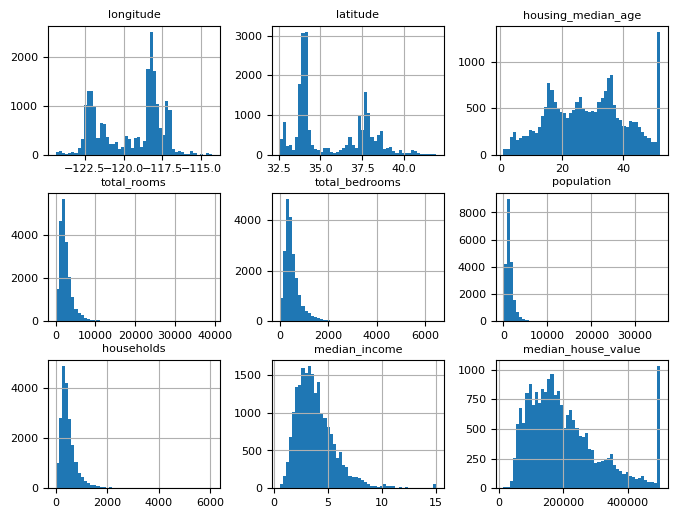

In [36]:
housing.hist(bins=50, figsize=(8, 6))
plt.show()

**Observations**
- `median_income` is expressed in 10000$ and is capped between 0.5-15000
- `median_house_value` - target, is capped 
- `housing_median_age` is capped
- attributes have different scales
- many attributes are skewed

### Create a Test Set

In [37]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**Stratified sampling** - instances are devided into homogeneous subgroups called *strata*, and the right number of instances sampled from each stratum

Since `median_income` is known to be an important attribute, let's use it for stratified sampling.

In [48]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

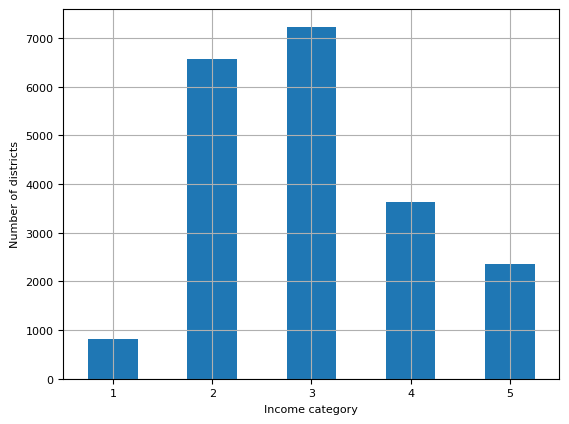

In [40]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [49]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [50]:
strat_train_set.drop(columns="income_cat", inplace=True)
strat_test_set.drop(columns="income_cat", inplace=True)

## Explore and Visualize the Data

**Notes:**
- 

## Prepare the Data for Machine Learning

**Notes:**
- 

## Select and Train a Model

**Notes:**
- 

## Fine-Tune Your Model

**Notes:**
- 

## Launch, Monitor, and Maintain

**Notes:**
- 

---
# Practical Examples

## Housing Price Prediction Project

In [ ]:
# Code for the housing project

## Exercises

1. 
2. 
3. 